# Debiasing Synthetic Data Generated by Deep Generative Models

Results of the case study on the Adult Census Income dataset in "Debiasing Synthetic Data Generated by Deep Generative Models", presented during the 38th Annual Conference on Neural Information Processing Systems.

**(c) SYNDARA**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import plotnine
from plotnine import *

## Load meta data

In [3]:
data_dir = 'data/'
meta_data = pd.read_csv(data_dir + 'meta_data.csv')

## Inspect meta data

In [4]:
meta_data.shape

(15, 8)

In [5]:
meta_data.head()

,n,dataset_type,samplemean,samplemean_ll,samplemean_ul,ols_coef,ols_coef_ll,ols_coef_ul
0,50,original,38.120000,35.179045,41.060955,8.898755,-0.849083,18.646592
1,50,synthetic,40.732194,37.538172,43.926216,6.896796,-0.938798,14.732390
2,50,targeted,38.101324,34.907302,41.295346,8.258087,0.422493,16.093681
3,274,original,40.624088,39.273551,41.974625,8.817081,5.251869,12.382293
4,274,synthetic,40.732194,39.367623,42.096765,6.896796,3.549222,10.244371


## Plot confidence intervals

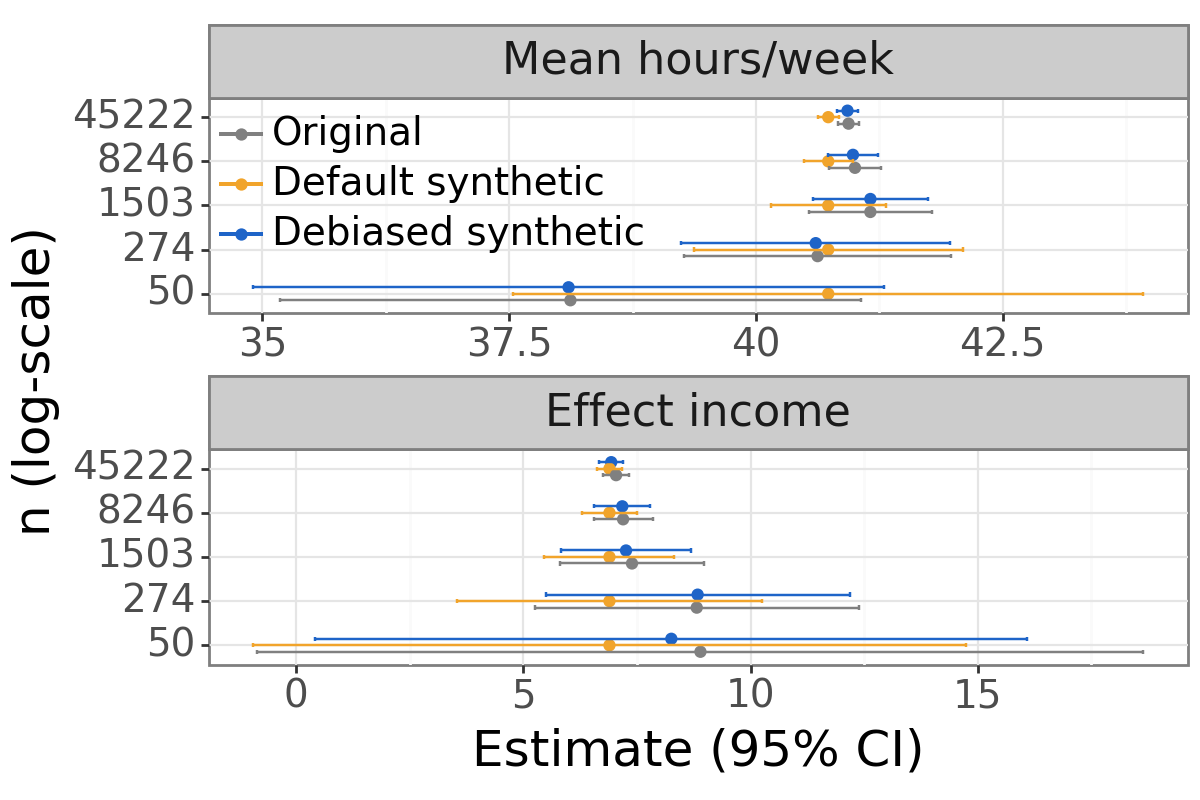

<Figure Size: (600 x 400)>

In [8]:
# Create subset for sample mean
new_cols_samplemean = {'n': 'n', 'dataset_type': 'dataset_type', 'samplemean': 'estimate', 'samplemean_ll': 'll', 'samplemean_ul': 'ul'}
meta_data_samplemean = meta_data[['n', 'dataset_type', 'samplemean', 'samplemean_ll', 'samplemean_ul']].copy().rename(columns=new_cols_samplemean)
meta_data_samplemean['estimator'] = 'samplemean'

# Create subset for OLS regression coefficient
new_cols_ols = {'n': 'n', 'dataset_type': 'dataset_type', 'ols_coef': 'estimate', 'ols_coef_ll': 'll', 'ols_coef_ul': 'ul'}
meta_data_ols = meta_data[['n', 'dataset_type', 'ols_coef', 'ols_coef_ll', 'ols_coef_ul']].copy().rename(columns=new_cols_ols)
meta_data_ols['estimator'] = 'ols'

# Combine into new dataset for plotting
plot_data = pd.concat([meta_data_samplemean, meta_data_ols], axis=0)
plot_data
plot_data['estimator'] = pd.Categorical(plot_data['estimator'], categories=plot_data['estimator'].unique()) # change order (non-alphabetically)

# Relabel
relabel_estimators = {'samplemean': 'Mean hours/week', 
                      'ols': 'Effect income'}

# Plot
ci_plot = ggplot(plot_data, aes(y='estimate', x='n', colour='dataset_type')) +\
    geom_point(position=position_dodge(0.75)) +\
    geom_errorbar(aes(ymin='ll', ymax='ul'), position=position_dodge(0.75)) +\
    scale_x_continuous(breaks=list(plot_data['n'].unique()), labels=list(plot_data['n'].unique()), trans='log') +\
scale_colour_manual(values={'original': '#808080', 'synthetic': '#F1A42B', 'targeted': '#1E64C8'}, # relabel legend
                    labels=['Original', 'Default synthetic', 'Debiased synthetic']) +\
    facet_wrap('estimator', scales='free', ncol=1, labeller=labeller(estimator=lambda x: relabel_estimators[x])) +\
    coord_flip() +\
    labs(colour='', y='Estimate (95% CI)', x='n (log-scale)') +\
    theme_bw() +\
    theme(plot_title=element_blank(), # title size
          axis_title=element_text(size=18), # axis title size
          strip_text=element_text(size=16), # facet_grid title size
          axis_text=element_text(size=14), # axis labels size
          legend_position=(0.36,0.77),
          legend_direction='vertical',
          legend_background=element_blank(),
          legend_key=element_blank(),
          legend_title=element_blank(), # legend title size
          legend_text=element_text(size=14), # legend labels size 
          figure_size=(6,4)) # OLD: (12,3)

ci_plot

In [7]:
#ci_plot.save('../plots/casestudy2_ci.pdf')